In [1]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

In [2]:
class PCA:

    def __init__(self, n_pc):
        
        self.n_pc = n_pc

    def fit(self, X):

        X_mean = np.mean(X, axis = 0)
        covariance_matrix = (X-X_mean).T.dot(X-X_mean)/(X.shape[0]-1)

        eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

        #sort eigenvectors according to their eigenvalues in decreasing order
        index = np.argsort(eigenvalues)[::-1]
        #eigenvalues = eigenvalues[index]
        eigenvectors = eigenvectors[:,index]

        #choose k number of eigenvectors(number of Principal Components)
        eigenvectors = eigenvectors.T
        PC = eigenvectors[0:self.n_pc]

        #transform original data points into k dimensional dataset
        return X.dot(PC.T)

    def plot(self, X):

        plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor="black", cmap="viridis")
        plt.title("Principal Component Analysis")
        plt.xlabel("Principal Component 1")
        plt.ylabel("Principal Component 2")
        plt.show()

Shape of dataset: (150, 4)
Shape of transformed dataset: (150, 2)


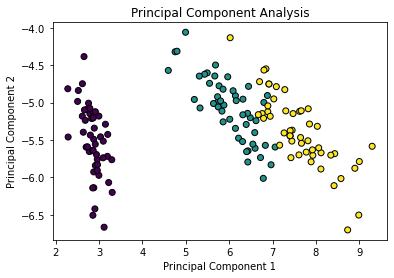

In [3]:
if __name__ == "__main__":

    iris_dataset = datasets.load_iris()
    X = iris_dataset.data
    y = iris_dataset.target

    pca = PCA(2)
    X2 = pca.fit(X)

    print("Shape of dataset:", X.shape)
    print("Shape of transformed dataset:", X2.shape)

    pca.plot(X2)